# Data Visualization - Ford GoBike System Data

# Table of Content 

1. [Introduction](#intro)


2. [Gathering Data](#gathering)


3. [Assessing Data](#assessing)


4. [Cleaning Data](#cleaning)


5. [Feature Engineering](#feature)


6. [Exploratory Analysis](#exploration)

    6.1 [Univariate Exploration of Data](#univariate)
    
    6.2 [Bivariate Exploration of Data](#bivariate)
    
    6.3 [Multivariate Exploration of Data](#multivariate)
    
   
7. [Final Notes](#notes)



<a id='intro'></a>
### Introduction 

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
This dataset will require some data wrangling in order to make it tidy for analysis. 

In [3]:
# Importing crucial libraries 

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='gathering'></a>
### Gathering Data

I downloaded the data set from the Udacity 

In [4]:
# Reading the file
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike

duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
...              ...                       ...                       ...   
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                start_station_name  \
0                   21.0  Montgomery St BART Station (Market St at 2nd St)   
1                   23.0                     The Embarcadero at Steuart St   
2                   86.0                           Market St at Dolores St   
3                  375.0                           Grove St at Masonic Ave   
4                    7.0                               Frank H Ogawa Plaza   
...                  ...                                               ...   
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
0                    37.789625              -122.400811            13.0   
1                    37.791464              -122.391034            81.0   
2                    37.769305              -122.426826             3.0   
3                    37.774836              -122.446546            70.0   
4                    37.804562              -122.271738           222.0   
...                        ...                      ...             ...   
183407               37.788059              -122.391865           324.0   
183408               37.789625              -122.400811            66.0   
183409               37.331932              -121.904888           277.0   
183410               37.811351              -122.273422           216.0   
183411               37.789677              -122.390428            37.0   

                                    end_station_name  end_station_latitude  \
0                     Commercial St at Montgomery St             37.794231   
1                                 Berry St at 4th St             37.775880   
2       Powell St BART Station (Market St at 4th St)             37.786375   
3                             Central Ave at Fell St             37.773311   
4                              10th Ave at E 15th St             37.792714   
...                                              ...                   ...   
183407           Union Square (Powell St at Post St)             37.788300   
183408                         3rd St at Townsend St             37.778742   
183409                     Morrison Ave at Julian St             37.333658   
183410                      San Pablo Ave at 27th St             37.817827   
183411                           2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
0                 -122.402923     4902    Customer             1984.0   
1                 -122.393170     2535    Customer                NaN   
2                 -122.404904     5905    Customer             1972.0   
3                 -122.44429

<a id='assessing'></a>
### Assessing Data 

In [5]:
# Viewing the data set
bike.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [6]:
# Viewing the data set 
bike.tail()

duration_sec                start_time                  end_time  \
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                                start_station_name  \
183407              27.0                           Beale St at Harrison St   
183408              21.0  Montgomery St BART Station (Market St at 2nd St)   
183409             278.0                            The Alameda at Bush St   
183410             220.0                       San Pablo Ave at MLK Jr Way   
183411              24.0                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  end_station_id  \
183407               37.788059              -122.391865           324.0   
183408               37.789625              -122.400811            66.0   
183409               37.331932              -121.904888           277.0   
183410               37.811351              -122.273422           216.0   
183411               37.789677              -122.390428            37.0   

                           end_station_name  end_station_latitude  \
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude  bike_id   user_type  member_birth_year  \
183407            -122.408531     4832  Subscriber             1996.0   
183408            -122.392741     4960  Subscriber             1984.0   
183409            -121.908586     3824  Subscriber             1990.0   
183410            -122.275698     5095  Subscriber             1988.0   
183411            -122.395936     1057  Subscriber             1989.0   

       member_gender bike_share_for_all_trip  
183407          Male                      No  
183408          Male                      No  
183409          Male                     Yes  
183410          Male                      No  
183411          Male                      No

In [7]:
# Finding row and column count
bike.shape

(183412, 16)

In [8]:
# Viewing detailed variables' info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [9]:
# Viewing the statistics 
bike.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [10]:
# Searching for duplicates 
bike.duplicated().sum()

0

In [11]:
# Finding unique users 
bike.bike_id.nunique()

4646

In [12]:
# Finding number of start station names 
bike.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [13]:
# Finding number of end station names 
bike.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [14]:
# Finding user types count
bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [15]:
# Finding gender count
bike.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [16]:
# Viewing number of null values 
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Assessment Summary 

#### Quality Issues 

- start_time variable data type is object, instead of datetime64
- end_time variable data type is object, instead of datetime64
- Missing values in the data set (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) 
- member_birth_year variable data type is float, should be datetime64 or float should be integer, as it is just year
- bike_id is integer, it is recommendable to be object
- start_station_id, end_station_id variable types are float, it is recommendable to be object. Besides, I will drop these columns. 


#### Tidiness Issues 

- N/A


In [17]:
# Making copy of the data set
bike_df = bike.copy()

<a id='cleaning'></a>
### Cleaning Data 

- start_time variable data type is object, instead of datetime64

#### Define 

Convert start_time data type from object to datetime64

#### Code

In [18]:
# Converting to datetime64
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])

#### Test

In [19]:
# Checking the result
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  object        
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

- end_time variable data type is object, instead of datetime64

#### Define 

Convert end_time data type from object to datetime64

#### Code

In [20]:
# Converting to the datetime64
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

#### Test 

In [21]:
# Checking the results 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

- Missing values in the data set (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) 

#### Define 

Drop null values

#### Code 

In [22]:
# Viewing the sum of null values by variable
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [23]:
# Droping null values
bike_df.dropna(inplace = True)

#### Test 

In [24]:
# Checking the results
bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [25]:
bike_df.sample(3)

duration_sec              start_time                end_time  \
97338            607 2019-02-15 08:59:51.862 2019-02-15 09:09:59.244   
77317            809 2019-02-19 07:16:28.044 2019-02-19 07:29:57.238   
182252           518 2019-02-01 08:26:54.827 2019-02-01 08:35:33.642   

        start_station_id                                 start_station_name  \
97338              124.0                              19th St at Florida St   
77317              119.0                                  18th St at Noe St   
182252              15.0  San Francisco Ferry Building (Harry Bridges Pl...   

        start_station_latitude  start_station_longitude  end_station_id  \
97338                37.760447              -122.410807            81.0   
77317                37.761047              -122.432642            67.0   
182252               37.795392              -122.394203           284.0   

                                         end_station_name  \
97338                                  Berry St at 4th St   
77317   San Francisco Caltrain Station 2  (Townsend St...   
182252  Yerba Buena Center for the Arts (Howard St at ...   

        end_station_latitude  end_station_longitude  bike_id   user_type  \
97338              37.775880            -122.393170     6443  Subscriber   
77317              37.776639            -122.395526     6552  Subscriber   
182252             37.784872            -122.400876      416  Subscriber   

        member_birth_year member_gender bike_share_for_all_trip  
97338              1991.0        Female                      No  
77317              1969.0          Male                      No  
182252             1972.0          Male                      No

- member_birth_year variable data type is float, should be datetime64 or float should be integer, as it is just year

#### Define 

Convert member_birth_year data type from float to integer 

#### Code

In [26]:
# Converting into integer
bike_df['member_birth_year'] = bike_df.member_birth_year.astype(int)

#### Test 

In [27]:
# Checking the results 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

- bike_id is integer, it is recommendable to be object


#### Define 

Convert bike_id data type from integer into object 

#### Code

In [28]:
# Converting to string 
bike_df['bike_id'] = bike_df['bike_id'].astype(str)

#### Test 

In [29]:
# Checking the results 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

- start_station_id, end_station_id variable types are float, it is recommendable to be object

#### Define

Drop the columns, as I will not need them

#### Code 

In [30]:
# Assigning the columns to the deleted_col variable 
deleted_col = ['start_station_id', 'end_station_id']

# Deleting the columns 
bike_df.drop(deleted_col, axis = 1, inplace = True)

#### Test 

In [31]:
# Checking the results 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  object        
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

In [32]:
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
2              -122.426826  Powell St BART Station (Market St at 4th St)   
3              -122.446546                        Central Ave at Fell St   
4              -122.271738                         10th Ave at E 15th St   
5              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude bike_id   user_type  \
0             37.794231            -122.402923    4902    Customer   
2             37.786375            -122.404904    5905    Customer   
3             37.773311            -122.444293    6638  Subscriber   
4             37.792714            -122.248780    4898  Subscriber   
5             37.798014            -122.405950    5200  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip  
0               1984          Male                      No  
2               1972          Male                      No  
3               1989         Other                      No  
4               1974          Male                     Yes  
5               1959          Male                      No

#### Questions & Answers 
- What is the structure of the data set?  
+ + A dataset written in the df standard consists of a series of records.

- What are the main features of interest in the data set? 
+ + gender
+ + user type 
+ + age of riders
+ + duration of rides
+ + distance 
+ + period of time
+ + days of week

- What features in the data set do you think will help to support investigation into your feature of interest? 
+ + start and end time of rides 
+ + member birth year
+ + longitudes and latitudes of the start and end points 

- These variables are crucial for the new feature engineering. 

<a id='feature'></a>
### Feature Engineering

Creating crucial variables from the existing variables for analysis 

In [39]:
# Creating week_days variable fron existing start_time variable
bike_df['week_days'] = bike_df['start_time'].dt.dayofweek

In [40]:
# Assigning the week days names to the corrosponding numbers 
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [41]:
# Mapping the week days 
bike_df['week_days'] = bike_df['week_days'].map(dmap)

In [42]:
# Creating years variable fron existing start_time variable
bike_df['years'] = bike_df['start_time'].dt.year

In [43]:
# Creating months variable fron existing start_time variable and mapping the month names
bike_df['months'] = bike_df['start_time'].dt.month
dmap = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
bike_df['months'] = bike_df['months'].map(dmap)

In [44]:
# Creating hours variable fron existing start_time variable
bike_df['hours'] = bike_df['start_time'].dt.hour

In [45]:
# Dividing the hours to morning, afternoon and night under period_of_day
bike_df['period_of_day'] = 'morning'
bike_df['period_of_day'][(bike_df['hours'] >= 12) & (bike_df['hours'] <= 17)] = 'afternoon'
bike_df['period_of_day'][(bike_df['hours'] >= 18) & (bike_df['hours'] <= 23)] = 'night'

/Users/lamanmammadli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lamanmammadli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
# Creating duration_min variable by dividing duration_sec to 60
bike_df['duration_min'] = bike_df['duration_sec'] / 60

In [47]:
# Converting to the integer data type
bike_df['duration_min'] = bike_df.duration_min.astype(int)

In [48]:
# Checking the results 
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
2              -122.426826  Powell St BART Station (Market St at 4th St)   
3              -122.446546                        Central Ave at Fell St   
4              -122.271738                         10th Ave at E 15th St   
5              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude bike_id   user_type  \
0             37.794231            -122.402923    4902    Customer   
2             37.786375            -122.404904    5905    Customer   
3             37.773311            -122.444293    6638  Subscriber   
4             37.792714            -122.248780    4898  Subscriber   
5             37.798014            -122.405950    5200  Subscriber   

   member_birth_year member_gender bike_share_for_all_trip week_days  years  \
0               1984          Male                      No       Thu   2019   
2               1972          Male                      No       Thu   2019   
3               1989         Other                      No       Thu   2019   
4               1974          Male                     Yes       Thu   2019   
5               1959          Male                      No       Thu   2019   

  months  hours period_of_day  duration_min  
0    Feb     17     afternoon           869  
2    Feb     12     afternoon          1030  
3    Feb     17     afternoon           608  
4    Feb     23         night            26  
5    Feb     23         night            29

In [49]:
# Checking the data types 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  object        
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

In [50]:
# I have taken this function from stack overflow 
import math

# Creating a function to calculate the distance (km) from the longitude and latitude 
def find_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    Source: https://gis.stackexchange.com/a/56589/15183
    """
    # convert decimal degrees to radians 
    
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [51]:
# Collecting the results in the list 
dist_list = []
for _ , row in bike_df.iterrows():
    dist_list.append(find_distance(row['start_station_latitude'], row['start_station_longitude'], row['end_station_latitude'], row['end_station_longitude']))


In [52]:
# Checking the number of the records 
print(len(dist_list))

174952


In [53]:
# Creating new variable distance-km and assigning the list to the variable 
bike_df['distance_km'] = dist_list

In [54]:
# Viewing the result
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
2              -122.426826  Powell St BART Station (Market St at 4th St)   
3              -122.446546                        Central Ave at Fell St   
4              -122.271738                         10th Ave at E 15th St   
5              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude bike_id  ... member_birth_year  \
0             37.794231            -122.402923    4902  ...              1984   
2             37.786375            -122.404904    5905  ...              1972   
3             37.773311            -122.444293    6638  ...              1989   
4             37.792714            -122.248780    4898  ...              1974   
5             37.798014            -122.405950    5200  ...              1959   

   member_gender bike_share_for_all_trip week_days years  months hours  \
0           Male                      No       Thu  2019     Feb    17   
2           Male                      No       Thu  2019     Feb    12   
3          Other                      No       Thu  2019     Feb    17   
4           Male                     Yes       Thu  2019     Feb    23   
5           Male                      No       Thu  2019     Feb    23   

   period_of_day duration_min  distance_km  
0      afternoon          869     0.360964  
2      afternoon         1030     2.639713  
3      afternoon          608     0.266376  
4          night           26     2.646282  
5          night           29     2.321460  

[5 rows x 21 columns]

In [55]:
bike_df.tail()

duration_sec              start_time                end_time  \
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

                                      start_station_name  \
183407                           Beale St at Harrison St   
183408  Montgomery St BART Station (Market St at 2nd St)   
183409                            The Alameda at Bush St   
183410                       San Pablo Ave at MLK Jr Way   
183411                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude  \
183407               37.788059              -122.391865   
183408               37.789625              -122.400811   
183409               37.331932              -121.904888   
183410               37.811351              -122.273422   
183411               37.789677              -122.390428   

                           end_station_name  end_station_latitude  \
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude bike_id  ... member_birth_year  member_gender  \
183407            -122.408531    4832  ...              1996           Male   
183408            -122.392741    4960  ...              1984           Male   
183409            -121.908586    3824  ...              1990           Male   
183410            -122.275698    5095  ...              1988           Male   
183411            -122.395936    1057  ...              1989           Male   

       bike_share_for_all_trip week_days years  months hours  period_of_day  \
183407                      No       Fri  2019     Feb     0        morning   
183408                      No       Fri  2019     Feb     0        morning   
183409                     Yes       Fri  2019     Feb     0        morning   
183410                      No       Fri  2019     Feb     0        morning   
183411                      No       Fri  2019     Feb     0        morning   

       duration_min  distance_km  
183407            8     1.852057  
183408            5     1.106417  
183409            2     0.423219  
183410            2     0.460008  
183411            4     0.672341  

[5 rows x 21 columns]

In [56]:
# Checking if there is a null value
bike_df.distance_km.isnull().sum()

0

In [57]:
# Checking the data types
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_name         174952 non-null  object        
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  object        
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  int64         
 12  member_gender   

In [58]:
# Rounding the distance_km records 
bike_df['distance_km'] = bike_df['distance_km'].round(decimals = 2)

In [59]:
# Checking the results
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
2              -122.426826  Powell St BART Station (Market St at 4th St)   
3              -122.446546                        Central Ave at Fell St   
4              -122.271738                         10th Ave at E 15th St   
5              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude bike_id  ... member_birth_year  \
0             37.794231            -122.402923    4902  ...              1984   
2             37.786375            -122.404904    5905  ...              1972   
3             37.773311            -122.444293    6638  ...              1989   
4             37.792714            -122.248780    4898  ...              1974   
5             37.798014            -122.405950    5200  ...              1959   

   member_gender bike_share_for_all_trip week_days years  months hours  \
0           Male                      No       Thu  2019     Feb    17   
2           Male                      No       Thu  2019     Feb    12   
3          Other                      No       Thu  2019     Feb    17   
4           Male                     Yes       Thu  2019     Feb    23   
5           Male                      No       Thu  2019     Feb    23   

   period_of_day duration_min  distance_km  
0      afternoon          869         0.36  
2      afternoon         1030         2.64  
3      afternoon          608         0.27  
4          night           26         2.65  
5          night           29         2.32  

[5 rows x 21 columns]

In [60]:
# Creating ages list from the existing member_birth_year variable

# Note: I replaced 2019 with the 'years' variable as suggested, 
# but there appeared a notification in the screen as the kernel is dead. 
# So I continue this time again with the 2019 

ages = []
for i in bike_df['member_birth_year']:
    age = 2019 - i
    ages.append(age)
     

In [62]:
# Creating age variable and assigning ages list to it
bike_df['age'] = ages

In [63]:
# Checking the results 
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
2                           Market St at Dolores St               37.769305   
3                           Grove St at Masonic Ave               37.774836   
4                               Frank H Ogawa Plaza               37.804562   
5                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
2              -122.426826  Powell St BART Station (Market St at 4th St)   
3              -122.446546                        Central Ave at Fell St   
4              -122.271738                         10th Ave at E 15th St   
5              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude bike_id  ... member_gender  \
0             37.794231            -122.402923    4902  ...          Male   
2             37.786375            -122.404904    5905  ...          Male   
3             37.773311            -122.444293    6638  ...         Other   
4             37.792714            -122.248780    4898  ...          Male   
5             37.798014            -122.405950    5200  ...          Male   

   bike_share_for_all_trip week_days years months  hours period_of_day  \
0                       No       Thu  2019    Feb     17     afternoon   
2                       No       Thu  2019    Feb     12     afternoon   
3                       No       Thu  2019    Feb     17     afternoon   
4                      Yes       Thu  2019    Feb     23         night   
5                       No       Thu  2019    Feb     23         night   

   duration_min distance_km  age  
0           869        0.36   35  
2          1030        2.64   47  
3           608        0.27   30  
4            26        2.65   45  
5            29        2.32   60  

[5 rows x 22 columns]

In [64]:
# Saving the new data set after cleaning and feature engineering 
bike_df.to_csv('biketrip_data_edited.csv')

In [65]:
# Reading the data 
bike_df = pd.read_csv('biketrip_data_edited.csv')

In [66]:
# Viewing the data 
bike_df.head()

Unnamed: 0  duration_sec               start_time                 end_time  \
0           0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.975   
1           2         61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.146   
2           3         36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.842   
3           4          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.074   
4           5          1793  2019-02-28 23:49:58.632  2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                           Market St at Dolores St               37.769305   
2                           Grove St at Masonic Ave               37.774836   
3                               Frank H Ogawa Plaza               37.804562   
4                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
1              -122.426826  Powell St BART Station (Market St at 4th St)   
2              -122.446546                        Central Ave at Fell St   
3              -122.271738                         10th Ave at E 15th St   
4              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude  ...  member_gender  \
0             37.794231            -122.402923  ...           Male   
1             37.786375            -122.404904  ...           Male   
2             37.773311            -122.444293  ...          Other   
3             37.792714            -122.248780  ...           Male   
4             37.798014            -122.405950  ...           Male   

  bike_share_for_all_trip  week_days years months hours  period_of_day  \
0                      No        Thu  2019    Feb    17      afternoon   
1                      No        Thu  2019    Feb    12      afternoon   
2                      No        Thu  2019    Feb    17      afternoon   
3                     Yes        Thu  2019    Feb    23          night   
4                      No        Thu  2019    Feb    23          night   

  duration_min  distance_km age  
0          869         0.36  35  
1         1030         2.64  47  
2          608         0.27  30  
3           26         2.65  45  
4           29         2.32  60  

[5 rows x 23 columns]

In [67]:
# Viewing the variable data types after saving and reading the new dataset 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               174952 non-null  int64  
 1   duration_sec             174952 non-null  int64  
 2   start_time               174952 non-null  object 
 3   end_time                 174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_name         174952 non-null  object 
 8   end_station_latitude     174952 non-null  float64
 9   end_station_longitude    174952 non-null  float64
 10  bike_id                  174952 non-null  int64  
 11  user_type                174952 non-null  object 
 12  member_birth_year        174952 non-null  int64  
 13  member_gender            174952 non-null  object 
 14  bike

**We need again to convert the data types of start_time and end_time and drop the 'Unnamed: 0' column.**

In [68]:
# Converting to the datetime64 from object

bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [69]:
# Checking the results
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               174952 non-null  int64         
 1   duration_sec             174952 non-null  int64         
 2   start_time               174952 non-null  datetime64[ns]
 3   end_time                 174952 non-null  datetime64[ns]
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  object        
 12  member_birth_yea

In [70]:
# Dropping the 'Unnamed: 0' column
bike_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [71]:
# Checking the results
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
2         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
3          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
4          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                           Market St at Dolores St               37.769305   
2                           Grove St at Masonic Ave               37.774836   
3                               Frank H Ogawa Plaza               37.804562   
4                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
1              -122.426826  Powell St BART Station (Market St at 4th St)   
2              -122.446546                        Central Ave at Fell St   
3              -122.271738                         10th Ave at E 15th St   
4              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude  bike_id  ... member_gender  \
0             37.794231            -122.402923     4902  ...          Male   
1             37.786375            -122.404904     5905  ...          Male   
2             37.773311            -122.444293     6638  ...         Other   
3             37.792714            -122.248780     4898  ...          Male   
4             37.798014            -122.405950     5200  ...          Male   

   bike_share_for_all_trip week_days years months  hours period_of_day  \
0                       No       Thu  2019    Feb     17     afternoon   
1                       No       Thu  2019    Feb     12     afternoon   
2                       No       Thu  2019    Feb     17     afternoon   
3                      Yes       Thu  2019    Feb     23         night   
4                       No       Thu  2019    Feb     23         night   

   duration_min distance_km  age  
0           869        0.36   35  
1          1030        2.64   47  
2           608        0.27   30  
3            26        2.65   45  
4            29        2.32   60  

[5 rows x 22 columns]

<a id='exploration'></a>
### Exploratory Analysis 

<a id='univariate'></a>
#### Univariate Exploration of Data

#### Questions 

- Which gender representatives ride more?
- Which user type representative ride more?
- When riders ride more in terms of days of week and during a day?
- In which month the riders ride more?

In [72]:
# Viewing the data set 
bike_df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
2         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
3          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
4          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

                                 start_station_name  start_station_latitude  \
0  Montgomery St BART Station (Market St at 2nd St)               37.789625   
1                           Market St at Dolores St               37.769305   
2                           Grove St at Masonic Ave               37.774836   
3                               Frank H Ogawa Plaza               37.804562   
4                      4th St at Mission Bay Blvd S               37.770407   

   start_station_longitude                              end_station_name  \
0              -122.400811                Commercial St at Montgomery St   
1              -122.426826  Powell St BART Station (Market St at 4th St)   
2              -122.446546                        Central Ave at Fell St   
3              -122.271738                         10th Ave at E 15th St   
4              -122.391198                            Broadway at Kearny   

   end_station_latitude  end_station_longitude  bike_id  ... member_gender  \
0             37.794231            -122.402923     4902  ...          Male   
1             37.786375            -122.404904     5905  ...          Male   
2             37.773311            -122.444293     6638  ...         Other   
3             37.792714            -122.248780     4898  ...          Male   
4             37.798014            -122.405950     5200  ...          Male   

   bike_share_for_all_trip week_days years months  hours period_of_day  \
0                       No       Thu  2019    Feb     17     afternoon   
1                       No       Thu  2019    Feb     12     afternoon   
2                       No       Thu  2019    Feb     17     afternoon   
3                      Yes       Thu  2019    Feb     23         night   
4                       No       Thu  2019    Feb     23         night   

   duration_min distance_km  age  
0           869        0.36   35  
1          1030        2.64   47  
2           608        0.27   30  
3            26        2.65   45  
4            29        2.32   60  

[5 rows x 22 columns]

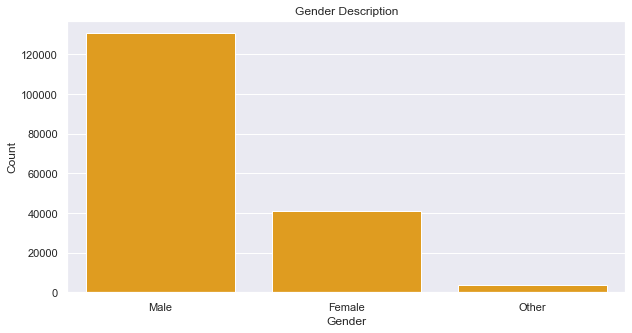

In [119]:
# Viewing gender count
# Static-ordering the bars
sb.countplot(data = bike_df, x = 'member_gender', color = 'orange', order=[1, 3, 2]);

# Dynamic-ordering the bars
# Returning a Series
freq = bike_df['member_gender'].value_counts()

# Getting the indexes of the Series
gen_order = freq.index

# Plotting the bar chart in the decreasing order of the frequency of the `member_gender`
sb.countplot(data = bike_df, x ='member_gender', color = 'orange', order = gen_order);

# Labeling the axes and title 
plt.title('Gender Description')
plt.xlabel('Gender')
plt.ylabel('Count')

# Displaying the plot
plt.show()


**Observation:**

**Male riders are more than female riders**

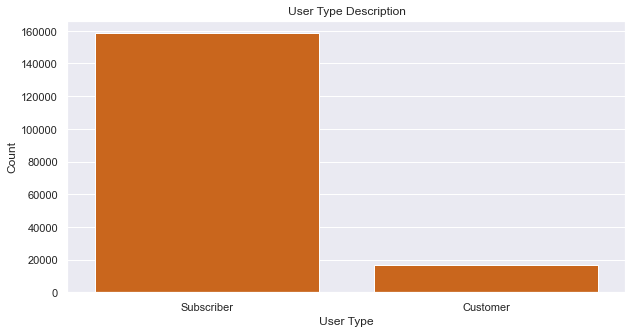

In [118]:
# Viewing user type count
# Dynamic-ordering the bars
# Returning a Series
freq = bike_df['user_type'].value_counts()

# Getting the indexes of the Series
user_order = freq.index

sb.countplot(data = bike_df, x = 'user_type', color = '#E66100', order = user_order)

# Labeling the axes and title 
plt.title('User Type Description')
plt.xlabel('User Type')
plt.ylabel('Count')

# Displaying the plot
plt.show()

**Observation:**

**Subscriber riders are more than customer riders**

Text(0, 0.5, 'Count')

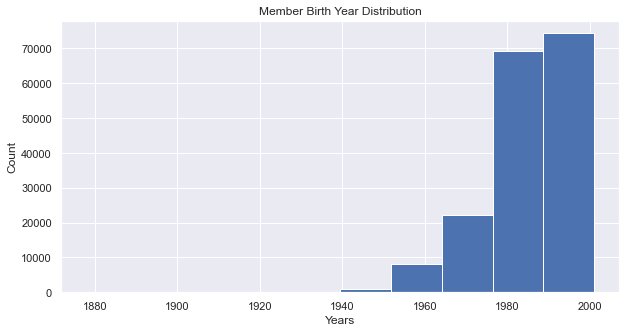

In [120]:
# Displaying histogram of member_birth_year
plt.hist(data = bike_df, x = 'member_birth_year')

# Labeling the axes and title 
plt.title('Member Birth Year Distribution')
plt.xlabel('Years')
plt.ylabel('Count')

**Observation:**

**Birth year/age is left-skewed.**

In [77]:
bike_df.describe()

duration_sec  start_station_latitude  start_station_longitude  \
count  174952.000000           174952.000000            174952.000000   
mean      704.002744               37.771220              -122.351760   
std      1642.204905                0.100391                 0.117732   
min        61.000000               37.317298              -122.453704   
25%       323.000000               37.770407              -122.411901   
50%       510.000000               37.780760              -122.398279   
75%       789.000000               37.797320              -122.283093   
max     84548.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude        bike_id  \
count         174952.000000          174952.000000  174952.000000   
mean              37.771414            -122.351335    4482.587555   
std                0.100295               0.117294    1659.195937   
min               37.317298            -122.453704      11.000000   
25%               37.770407            -122.411647    3799.000000   
50%               37.781010            -122.397437    4960.000000   
75%               37.797673            -122.286533    5505.000000   
max               37.880222            -121.874119    6645.000000   

       member_birth_year     years          hours   duration_min  \
count      174952.000000  174952.0  174952.000000  174952.000000   
mean         1984.803135    2019.0      13.456165      11.241461   
std            10.118731       0.0       4.734282      27.371269   
min          1878.000000    2019.0       0.000000       1.000000   
25%          1980.000000    2019.0       9.000000       5.000000   
50%          1987.000000    2019.0      14.000000       8.000000   
75%          1992.000000    2019.0      17.000000      13.000000   
max          2001.000000    2019.0      23.000000    1409.000000   

         distance_km            age  
count  174952.000000  174952.000000  
mean        1.478337      34.196865  
std         1.038416      10.118731  
min         0.000000      18.000000  
25%         0.770000      27.000000  
50%         1.200000      32.000000  
75%         1.940000      39.000000  
max        63.760000     141.000000

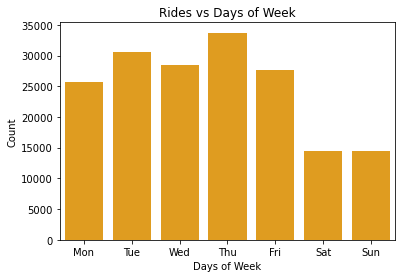

<Figure size 432x216 with 0 Axes>

In [78]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Viewing rides during the week days 
sb.countplot(data = bike_df, x = 'week_days', color = 'orange', order = order)

# Labeling the axes and title 
plt.title('Rides vs Days of Week')
plt.xlabel('Days of Week')
plt.ylabel('Count')
plt.figure(figsize = (6, 3))

# Display the plot
plt.show()

**Observation:**

**Riders are more active on Tuesday, and less active on weekends.**

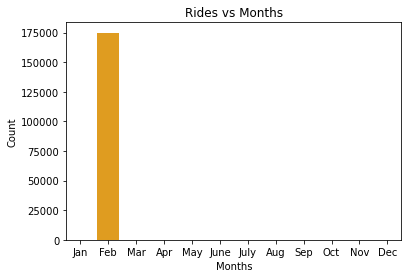

<Figure size 432x216 with 0 Axes>

In [79]:
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Viewing the rides across months 

sb.countplot(data = bike_df, x = 'months', color = 'orange', order = order)

# Labeling the axes and title 
plt.title('Rides vs Months')
plt.xlabel('Months')
plt.ylabel('Count')

# Setting the plot size
plt.figure(figsize = (6, 3))

# Display the plot
plt.show()

**Observation:**

**The dataset covers only 2019 February.**

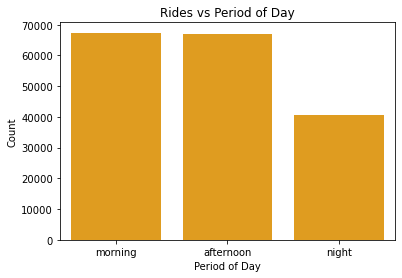

<Figure size 432x216 with 0 Axes>

In [80]:
order = ['morning', 'afternoon', 'night']

# Viewing the rides during a day
sb.countplot(data = bike_df, x = 'period_of_day', color = 'orange', order = order)

# Labeling the axes and title 
plt.title('Rides vs Period of Day')
plt.xlabel('Period of Day')
plt.ylabel('Count')

# Setting the plot size
plt.figure(figsize = (6, 3))

# Display the plot
plt.show()

**Observation:**

**Riders are more active during the morning, and less active at nights.**

/Users/lamanmammadli/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

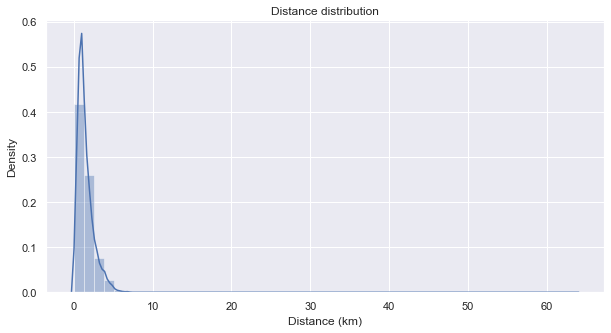

In [121]:
# Viewing the distance_km distribution
sb.distplot(bike_df['distance_km'])

# Labeling the axes and title 
plt.title('Distance distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Density')

**Observation:**

**The distance is right-skewed.**

Text(0, 0.5, 'Count')

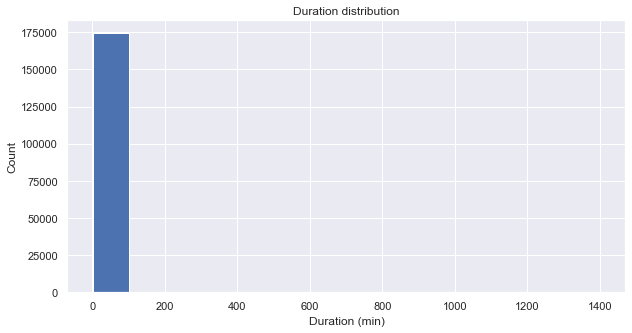

In [122]:
# Viewing the duration_min distribution

bins = np.arange(1, bike_df['duration_min'].max() + 10, 100)

plt.hist(data = bike_df, x = 'duration_min', bins = bins)

# Labeling the axes and title 
plt.title('Duration distribution')
plt.xlabel('Duration (min)')
plt.ylabel('Count')

Text(0.5, 0, 'Age')

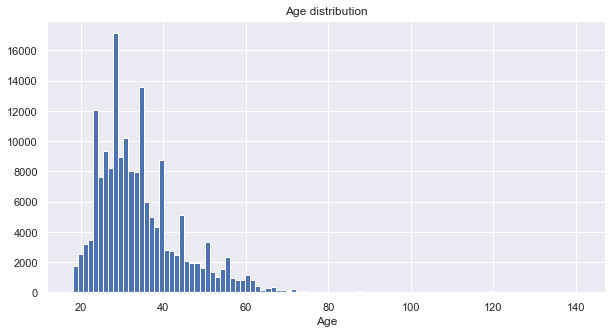

In [123]:
# Viewing the age distribution
plt.hist(data = bike_df, x = 'age', bins = 100)

# Labeling the axes and title 
plt.title('Age distribution')
plt.xlabel('Age')


#### Summary 

- Which gender representatives ride more? - Males ride more than females. 

- Which user type representative ride more? - Subscriber riders are more than customers. 

- When riders ride more and less in terms of days of week and during a day? - Riders ride more in Thursday in comparision with other days, and less during the weekends. Moreover, rider are more active during the mornings, less active at nights. 

- In which month the riders ride more? - The data covers only the 2019 February records. 

<a id='bivariate'></a>
#### Bivariate Exploration of Data

#### Questions 

- Is there a relationship between the age of riders and the duration of the rides? 
- Is there a relationship between the age of riders and the distance commuted? 
- Which gender representative rides more in duration?
- Which user type representative rides more in duration?
- Which gender representative is more prone to be subscriber?
- Which gender is more prone to ride during the week?
- Which gender is more prone to ride during the day?
- What are the top 5 highest duration ride start stations?
- What are the top 5 highest duration ride end stations?
- What is the user type's age distribution?
- What is the gender's age distribution?
- Which user type representative ride more in distance?
- Which gender representative ride more in distance?
- In what period of time the riders ride more in distance?


Text(0, 0.5, 'Duration (min)')

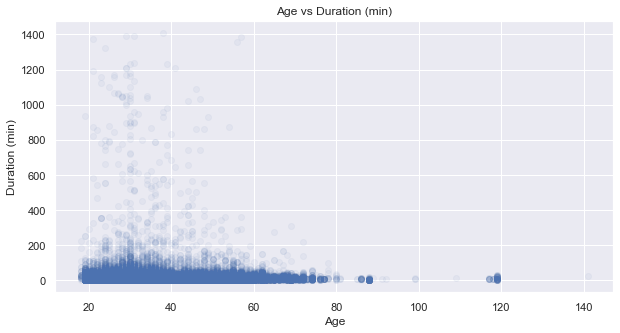

In [124]:
# Viewing the relationship between age and duration of the rides 
plt.scatter(data = bike_df, x = 'age', y = 'duration_min', alpha=1/20)

# Labeling the axes and title 
plt.title('Age vs Duration (min)')
plt.xlabel('Age')
plt.ylabel('Duration (min)')

Text(0, 0.5, 'Duration (min)')

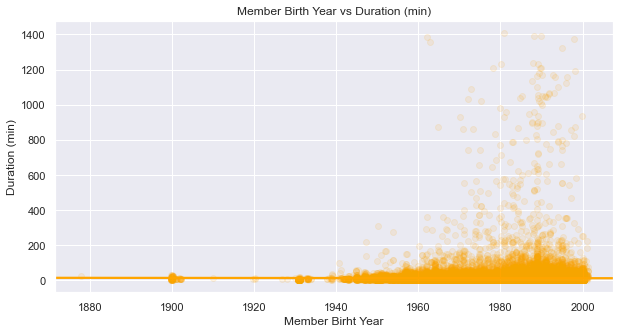

In [125]:
# Viewing the relationship between member_birth_year and duration of the rides (same with the above)
sb.regplot(data = bike_df, x = 'member_birth_year', y = 'duration_min', color = 'orange', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10})

# Labeling the axes and title 
plt.title('Member Birth Year vs Duration (min)')
plt.xlabel('Member Birht Year')
plt.ylabel('Duration (min)')

**Observation:**

**Young riders ride more in duration.**

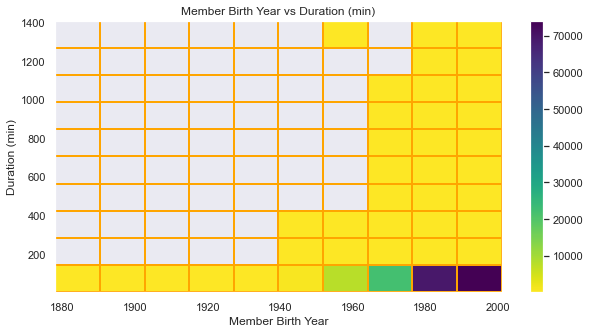

In [127]:
# Using cmin to set a minimum bound of counts 
# Using cmap to reverse the color map.

plt.hist2d(data = bike_df, x = 'member_birth_year', y = 'duration_min', color = 'orange', cmin=0.5, cmap='viridis_r')
plt.colorbar()
# Labeling the axes and title 
plt.title('Member Birth Year vs Duration (min)')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (min)');


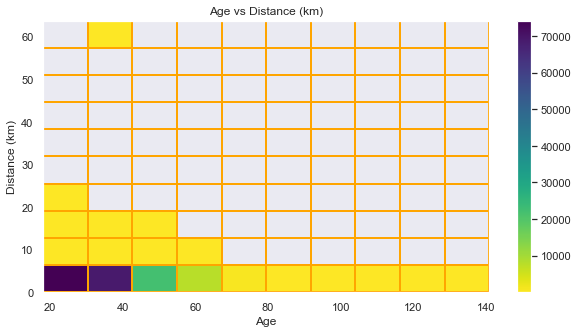

In [128]:
# Using cmap to reverse the color map.

plt.hist2d(data = bike_df, x = 'age', y = 'distance_km', color = 'orange', cmin=0.5, cmap='viridis_r')
plt.colorbar()

# Labeling the axes and title 
plt.title('Age vs Distance (km)')
plt.xlabel('Age')
plt.ylabel('Distance (km)');

**Observation:**

**Young riders ride more in distance.**

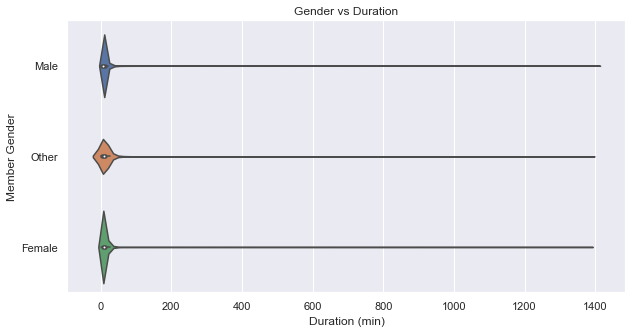

In [129]:
# Viewing duration of rides by each gender 
sb.violinplot(data = bike_df, x = 'duration_min', y = 'member_gender')

# Labeling the axes and title 
plt.title('Gender vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Member Gender');

**Observation:**

**Females and males ride almost the same duration.**

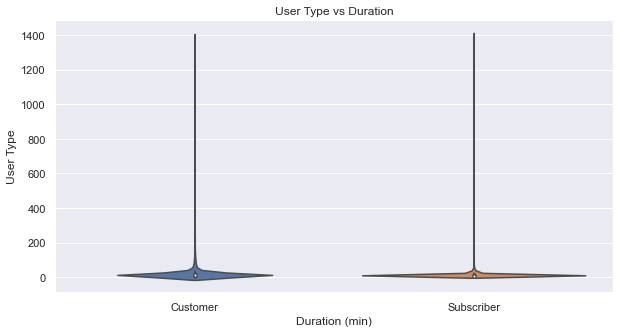

In [130]:
# Viewing duration of rides by each user type
sb.violinplot(data = bike_df, x = 'user_type', y = 'duration_min')

# Labeling the axes and title 
plt.title('User Type vs Duration')
plt.xlabel('Duration (min)')
plt.ylabel('User Type');

**Observation:**

**Subscribers and customers ride almost the same duration.**

In [90]:
# using the function 'idmin' and 'idmax' to find the index of lowest and highest duration, respectively. 
def find_minmax(var_name):
    # using the function 'idmin' to find the index of lowest duration.
    min_index = bike_df[var_name].idxmin()
    # using the function 'idmax' to find the index of highest duration.
    max_index = bike_df[var_name].idxmax()
    high = pd.DataFrame(bike_df.loc[max_index,:])
    low = pd.DataFrame(bike_df.loc[min_index,:])
    
    # printing the start and end station with high and low duration
    print("Ride which has highest "+ var_name + " : ", bike_df['start_station_name'][max_index])
    print("Ride which has lowest "+ var_name + "  : ", bike_df['start_station_name'][min_index])
    print("Ride which has highest "+ var_name + " : ", bike_df['end_station_name'][max_index])
    print("Ride which has lowest "+ var_name + "  : ", bike_df['end_station_name'][min_index])
    return pd.concat([high, low],axis = 1)

# calling the find_minmax function.
find_minmax('duration_min')

Ride which has highest duration_min :  Powell St BART Station (Market St at 4th St)
Ride which has lowest duration_min  :  4th St at 16th St
Ride which has highest duration_min :  Myrtle St at Polk St
Ride which has lowest duration_min  :  4th St at Mission Bay Blvd S


81604  \
duration_sec                                                    84548   
start_time                                 2019-02-16 15:48:25.029000   
end_time                                   2019-02-17 15:17:33.080000   
start_station_name       Powell St BART Station (Market St at 4th St)   
start_station_latitude                                      37.786375   
start_station_longitude                                   -122.404904   
end_station_name                                 Myrtle St at Polk St   
end_station_latitude                                        37.785434   
end_station_longitude                                     -122.419622   
bike_id                                                          6301   
user_type                                                  Subscriber   
member_birth_year                                                1981   
member_gender                                                    Male   
bike_share_for_all_trip                                            No   
week_days                                                         Sat   
years                                                            2019   
months                                                            Feb   
hours                                                              15   
period_of_day                                               afternoon   
duration_min                                                     1409   
distance_km                                                      1.64   
age                                                                38   

                                                40     
duration_sec                                      116  
start_time                 2019-02-28 23:44:00.988000  
end_time                   2019-02-28 23:45:57.482000  
start_station_name                  4th St at 16th St  
start_station_latitude                      37.767045  
start_station_longitude                   -122.390833  
end_station_name         4th St at Mission Bay Blvd S  
end_station_latitude                        37.770407  
end_station_longitude                     -122.391198  
bike_id                                           823  
user_type                                  Subscriber  
member_birth_year                                1959  
member_gender                                    Male  
bike_share_for_all_trip                            No  
week_days                                         Thu  
years                                            2019  
months                                            Feb  
hours                                              23  
period_of_day                                   night  
duration_min                                        1  
distance_km                                       0.2  
age                                                60

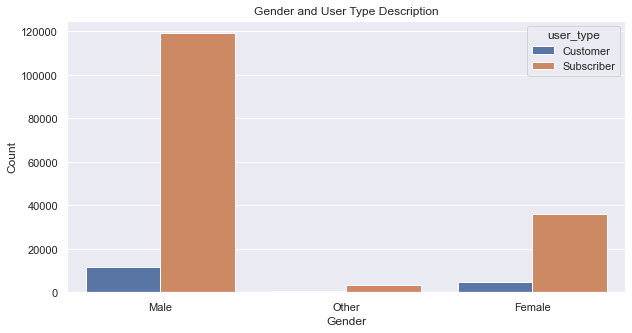

In [131]:
# Viewing gender and user type counts
sb.countplot(data = bike_df, x = 'member_gender', hue = 'user_type')

# Labeling the axes and title 
plt.title('Gender and User Type Description')
plt.xlabel('Gender')
plt.ylabel('Count');


**Observation:**

**Male subscriber riders are more than female subscribers.**

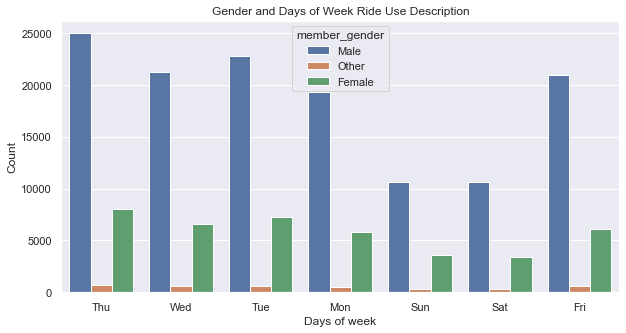

In [132]:
# Viewing weekly use of rides by each gender 
sb.countplot(data = bike_df, x = 'week_days', hue = 'member_gender')

# Labeling the axes and title 
plt.title('Gender and Days of Week Ride Use Description')
plt.xlabel('Days of week')
plt.ylabel('Count');

**Observation:**

**Male riders ride more in each day of the week than females.**

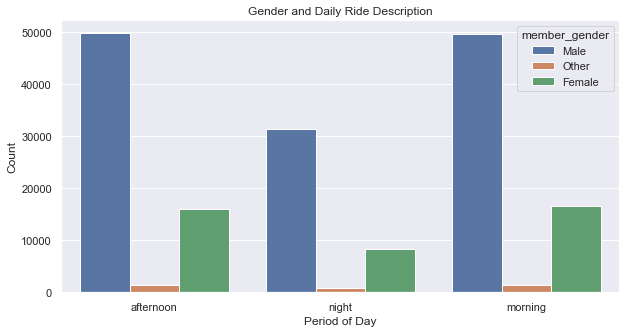

In [133]:
# Viewing rides during the day by each gender 
sb.countplot(data = bike_df, x = 'period_of_day', hue = 'member_gender')

# Labeling the axes and title 
plt.title('Gender and Daily Ride Description')
plt.xlabel('Period of Day')
plt.ylabel('Count');

**Observation:**

**Male riders ride more during the day than female ones.**

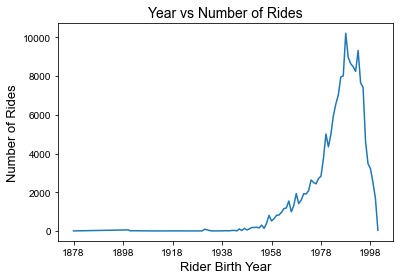

In [94]:
# Viewing the rides by each member_birth_year
bike_df.groupby('member_birth_year').count()['bike_id'].plot(xticks = np.arange(1878,2001,20))

#set the figure size and labels
sb.set(rc={'figure.figsize':(10,5)})
plt.title("Year vs Number of Rides", fontsize = 14)
plt.xlabel('Rider Birth Year',fontsize = 13)
plt.ylabel('Number of Rides',fontsize = 13)

#set the style sheet
sb.set_style("whitegrid")

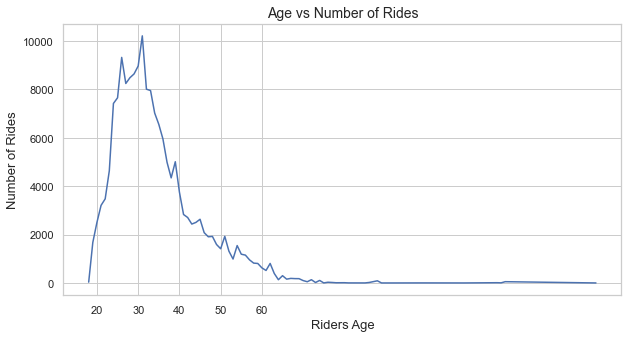

In [95]:
# Viewing the rides by each age (same with the above plot)
bike_df.groupby('age').count()['bike_id'].plot(xticks = np.arange(20,70,10))

#set the figure size and labels
sb.set(rc={'figure.figsize':(10,5)})
plt.title("Age vs Number of Rides", fontsize = 14)
plt.xlabel('Riders Age',fontsize = 13)
plt.ylabel('Number of Rides',fontsize = 13)

#set the style sheet
sb.set_style("whitegrid")

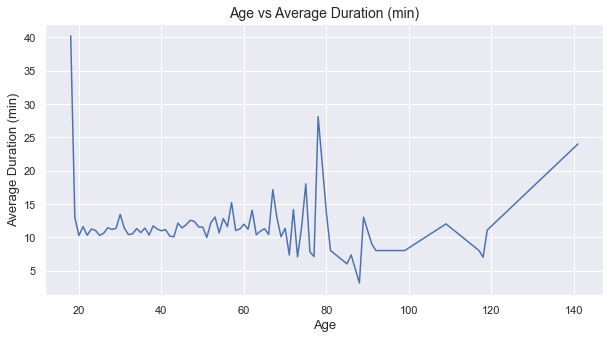

In [134]:
# doing age-wise analysis of rides' duration .
# taking the average of duration made by riders 
# making the group of the data according to their ages and find the mean duration and plot.
bike_df.groupby('age')['duration_min'].mean().plot()

# setup the title and labels of the figure.
plt.title("Age vs Average Duration (min)",fontsize = 14)
plt.xlabel('Age',fontsize = 13)
plt.ylabel('Average Duration (min)',fontsize = 13)

# setup the figure size.
sb.set(rc={'figure.figsize':(10,5)})
sb.set_style("whitegrid")

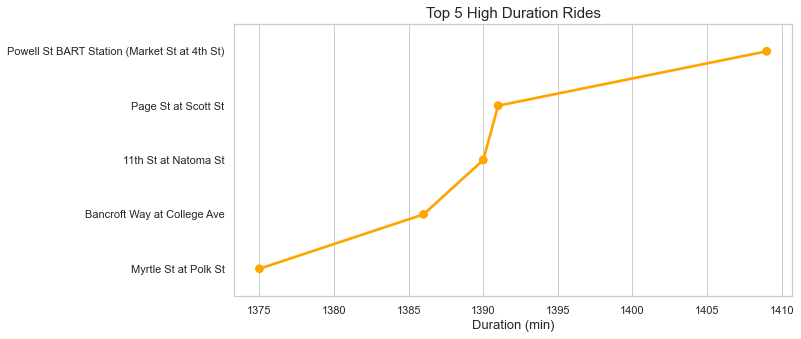

In [97]:
# top 5 start station which took highest duration
# sort the 'duration_min' column in decending order and store it in the new dataframe
info = pd.DataFrame(bike_df['duration_min'].sort_values(ascending = False))
info['start_station_name'] = bike_df['start_station_name']
data = list(map(str,(info['start_station_name'])))

# extract the top 5 start stations which took highest duration from the list and dataframe
x = list(data[:5])
y = list(info['duration_min'][:5])

# make the point plot and setup the title and labels
ax = sb.pointplot(x = y, y = x, color = 'orange')
sb.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Duration Rides",fontsize = 15)
ax.set_xlabel("Duration (min)",fontsize = 13)
sb.set_style("darkgrid")

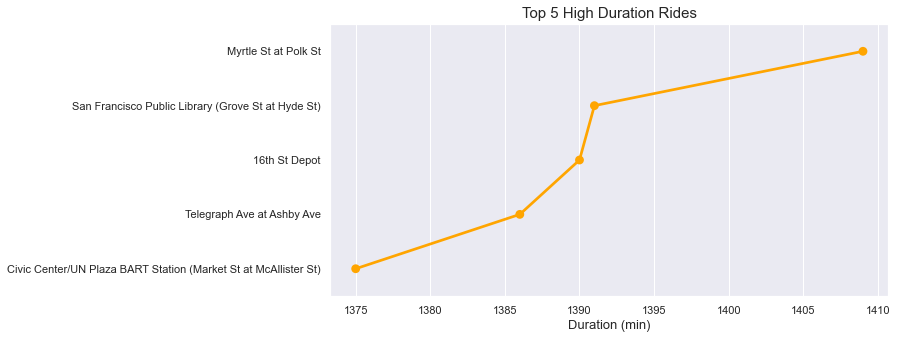

In [98]:
# top 5 start station which took highest duration
# sort the 'duration_min' column in decending order and store it in the new dataframe
info = pd.DataFrame(bike_df['duration_min'].sort_values(ascending = False))
info['end_station_name'] = bike_df['end_station_name']
data = list(map(str,(info['end_station_name'])))

# extract the top 5 start stations which took highest duration from the list and dataframe
x = list(data[:5])
y = list(info['duration_min'][:5])

# make the point plot and setup the title and labels
ax = sb.pointplot(x = y, y = x, color = 'orange')
sb.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 5 High Duration Rides",fontsize = 15)
ax.set_xlabel("Duration (min)",fontsize = 13)
sb.set_style("darkgrid")

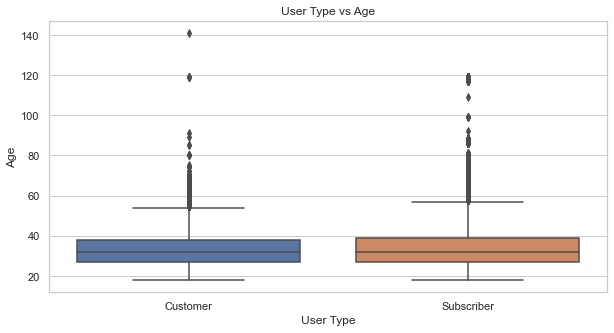

In [135]:
# Viewing age and user type relationship
sb.boxplot(data = bike_df, x = 'user_type', y = 'age')

# Labeling the axes and title 
plt.title('User Type vs Age')
plt.xlabel('User Type')
plt.ylabel('Age');

**Observation:**

**Customer and subscriber riders have the almost same average age.**

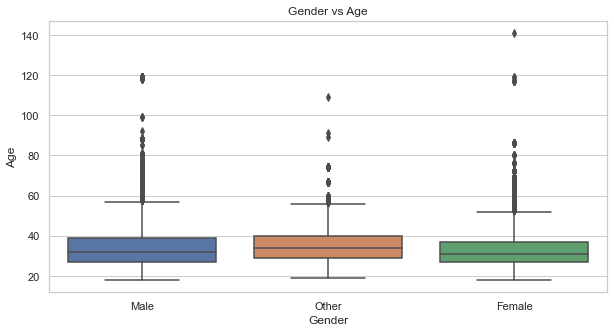

In [136]:
# Viewing age and gender relationship
sb.boxplot(data = bike_df, x = 'member_gender', y = 'age')

# Labeling the axes and title 
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age');

**Observation:**

**Male and female riders have the almost same average age.**

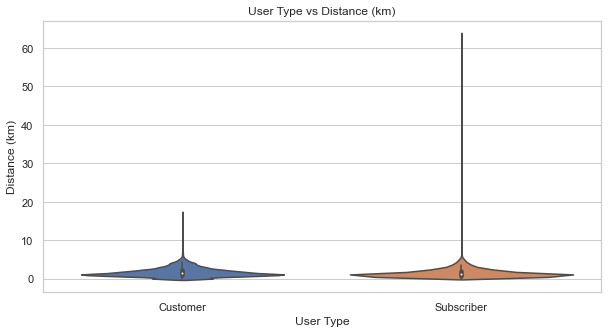

In [137]:
# Viewing distance and user type relationship
sb.violinplot(data = bike_df, x = 'user_type', y = 'distance_km')

# Labeling the axes and title 
plt.title('User Type vs Distance (km)')
plt.xlabel('User Type')
plt.ylabel('Distance (km)');

**Observation:**

**Customer and subscriber riders ride almost the same distance.**

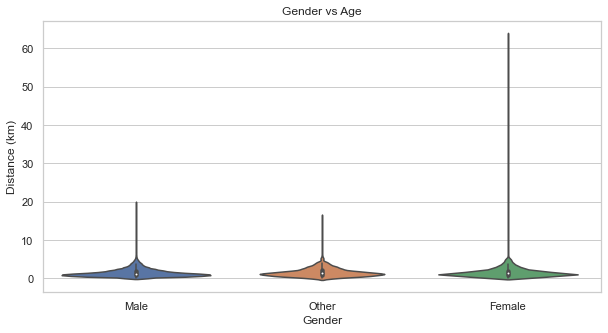

In [138]:
# Viewing distance and gender relationship
sb.violinplot(data = bike_df, x = 'member_gender', y = 'distance_km')  

# Labeling the axes and title 
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Distance (km)');

**Observation:**

**Male and female riders ride almost the same distance.**

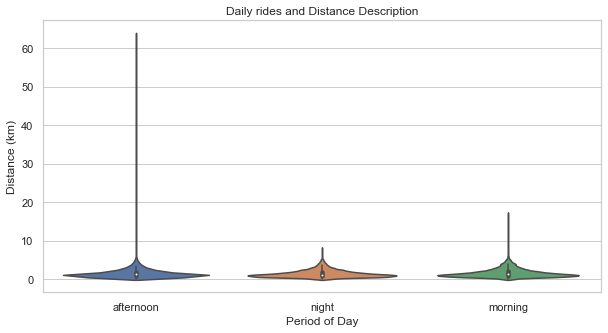

In [139]:
# Viewing distnace and period of day relationship
sb.violinplot(data = bike_df, x = 'period_of_day', y = 'distance_km')

# Labeling the axes and title 
plt.title('Daily rides and Distance Description')
plt.xlabel('Period of Day')
plt.ylabel('Distance (km)');

**Observation**

**Commuted distance is almost the same during the different periods of time.**

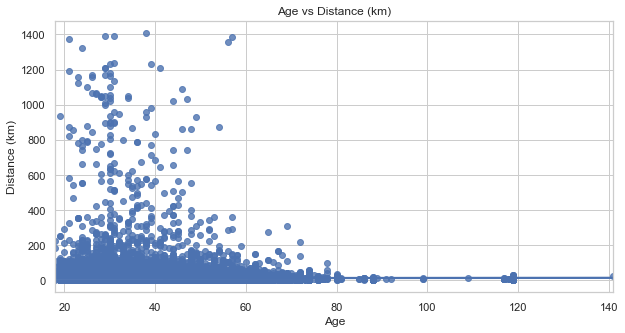

In [140]:
# Viewing the realtionship between age and duration 
sb.regplot(data = bike_df, x = 'age', y = 'duration_min')

# Labeling the axes and title 
plt.title('Age vs Distance (km)')
plt.xlabel('Age')
plt.ylabel('Distance (km)');

#### Summary 

- Is there a relationship between the age of riders and the duration of the rides?   -  Young people ride more in duration. 

- Is there a relationship between the age of riders and the distance commuted? - Young people ride more in distance. 

- Which gender representative rides more in duration? - Females and males ride almost the same duration.

- Which user type representative rides more in duration? - Subscribers and customers ride almost the same duration.

- Which gender representative is more prone to be subscriber? - Males are more prone to be subscriber.

- Which gender is more prone to ride during the week? - Males are more prone to ride during the week. 

- Which gender is more prone to ride during the day? - Males are more prone to ride during the day. 

- What is the user type's age distribution? - Customer and subscriber riders have the almost same average age.

- What is the gender's age distribution? - Male and female riders have the almost same average age.

- Which user type representative ride more in distance? - Customer and subscriber riders ride almost the same distance.

- Which gender representative ride more in distance? - Male and female riders ride almost the same distance.

- In what period of time the riders ride more in distance? - Commuted distance is almost the same during the different periods of time. 


<a id='multivariate'></a>
#### Multivariate Exploration of Data 

#### Questions

- When do the younger riders ride bike? 
- When the ride duration is the lowest? 
- When the ride duration is the lowest? 

/Users/lamanmammadli/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


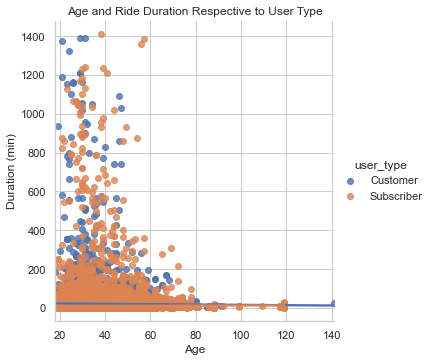

In [141]:
# Viewing relationship between age and duration according to user type
g = sb.FacetGrid(data = bike_df, hue = 'user_type', size = 5)
g.map(sb.regplot, 'age', 'duration_min')
g.add_legend()

# Labeling the axes and title 
plt.title('Age and Ride Duration Respective to User Type')
plt.xlabel('Age')
plt.ylabel('Duration (min)');

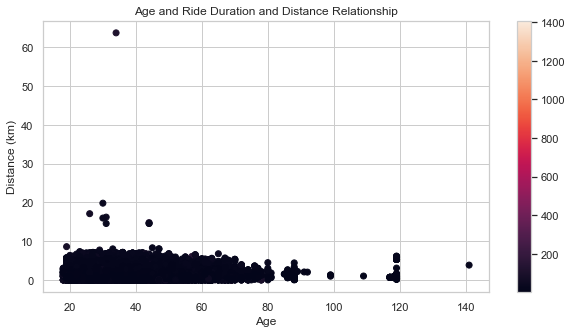

In [142]:
# Viewing the relationship among age, distance and duration
plt.scatter(data = bike_df, x = 'age', y = 'distance_km', c = 'duration_min')
plt.colorbar()

# Labeling the axes and title 
plt.title('Age and Ride Duration and Distance Relationship')
plt.xlabel('Age')
plt.ylabel('Distance (km)');

<AxesSubplot:xlabel='period_of_day', ylabel='week_days'>

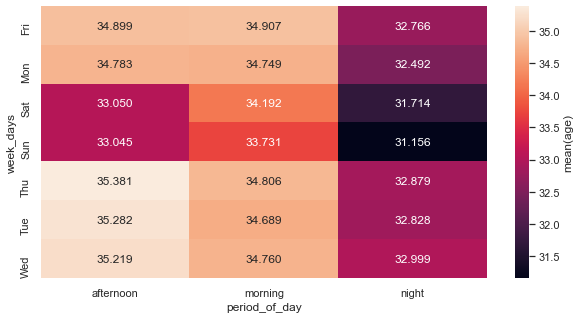

In [110]:
# Mapping the above plot in a heat map
period_means = bike_df.groupby(['period_of_day', 'week_days']).mean()['age']
period_means = period_means.reset_index(name = 'num_var2_avg')
period_means = period_means.pivot(index = 'week_days', columns = 'period_of_day',
                            values = 'num_var2_avg')
sb.heatmap(period_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(age)'})

**Observation**

**During the weekend, at night, the riders are the youngest.**

<AxesSubplot:xlabel='period_of_day', ylabel='week_days'>

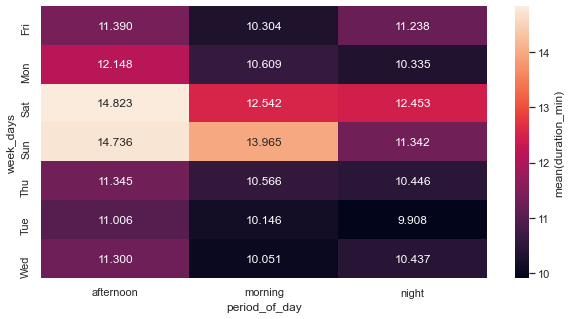

In [111]:
# Heat map of the average duration of rides in combination of week days and period of day 
period_means = bike_df.groupby(['period_of_day', 'week_days']).mean()['duration_min']
period_means = period_means.reset_index(name = 'num_var2_avg')
period_means = period_means.pivot(index = 'week_days', columns = 'period_of_day',
                            values = 'num_var2_avg')
sb.heatmap(period_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'})

**Observation**

**During the morning and night, on Tuesday and Wednesday the duration is minimum, however, on Saturday and Sunday afternoon the duration is maximum.**

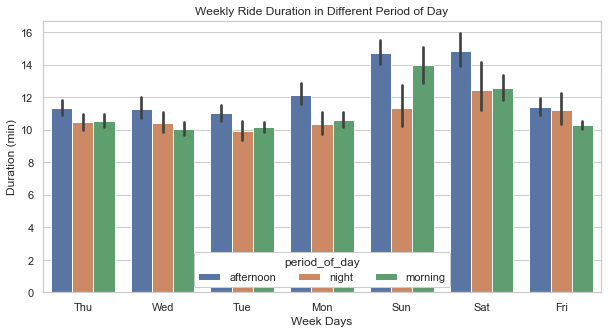

In [148]:
# Viewing ride duration during the week and period of day
ax = sb.barplot(data = bike_df, x = 'week_days', y = 'duration_min', hue = 'period_of_day')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'period_of_day')

# Labeling the axes and title 
plt.title('Weekly Ride Duration in Different Period of Day')
plt.xlabel('Week Days')
plt.ylabel('Duration (min)');

**Observation**

**During the weekends, afternoon ride duration average is the highest.**

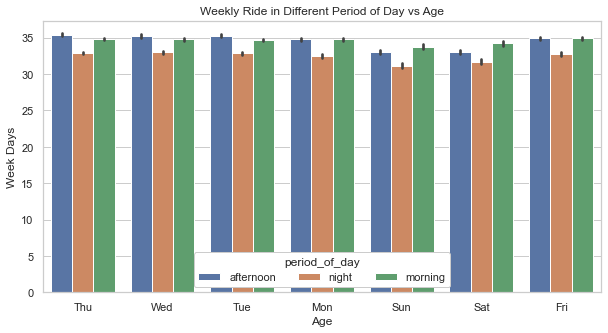

In [149]:
# Viewing riders' age which take rides during the week and period of day
ax = sb.barplot(data = bike_df, x = 'week_days', y = 'age', hue = 'period_of_day')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'period_of_day')


# Labeling the axes and title 
plt.title('Weekly Ride in Different Period of Day vs Age')
plt.xlabel('Age')
plt.ylabel('Week Days');

**Observation**

**During the weekends, afternoon ride duration average is the highest.**

#### Summary 

- When do the younger riders ride bike? - During the weekend, at night, the riders are the youngest.

- When the ride duration is the lowest? - During the morning and night, on Tuesday and Wednesday the duration is minimum.

- When the ride duration is the highest? - During the weekends, afternoon ride duration average is the highest.


<a id='notes'></a>
### Final Notes

From the observation stated above, I selected these to focus on for the explanatory analysis:

- Rides are more during the morning than afternoon and night, rides are lower than other times during the night
- Younger people rides longer distance than older ones 
- Males are more prone to be subscriber than females
- Males ride more than females 
- During the weekends, duration of the rides are the highest on afternoons, however, in general, rides during the weekends are the lowest.
